<a href="https://colab.research.google.com/github/samusu19/heart-disease-prediction/blob/main/Copy_of_Cardiovascular_Disease_Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Pre-Processing Dataset

In [ ]:
pip install chardet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd  # Import the pandas library and give it the alias 'pd'

crd = pd.read_csv('/content/cardio_train.csv', delimiter=";")

In [ ]:
crd

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
crd.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
crd.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
crd.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
crd.shape

(70000, 13)

In [ ]:
crd["age"] = crd["age"]/365


In [ ]:
crd.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
crd['age'] = crd['age'].astype(int)

In [ ]:
# Pre-Processing Completed.

In [ ]:
crd.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


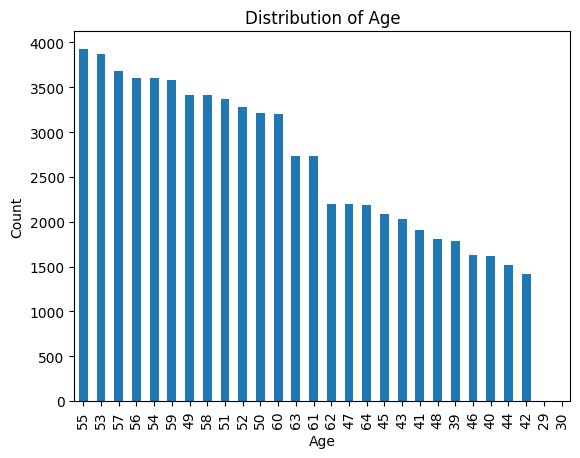

In [ ]:
 # Now ploting a bar graph for Age

import matplotlib.pyplot as plt
crd['age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

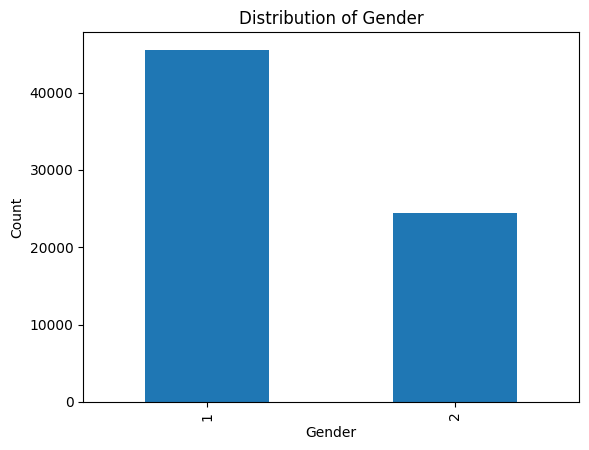

In [ ]:
#  Now ploting a bar graph for gender

import matplotlib.pyplot as plt
crd['gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()


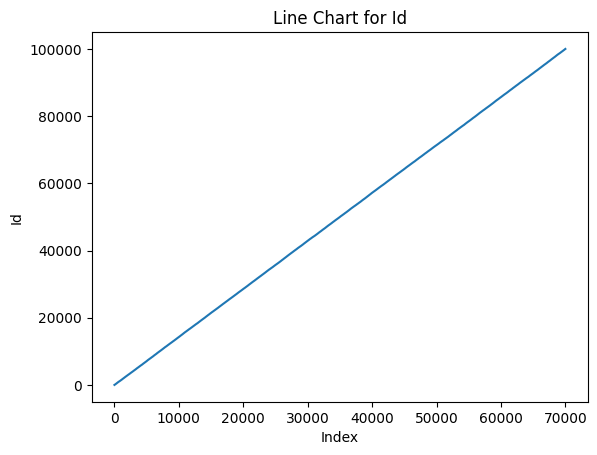

In [ ]:
#  a line chart for id

import matplotlib.pyplot as plt
plt.plot(crd['id'])
plt.xlabel("Index")
plt.ylabel("Id")
plt.title("Line Chart for Id")
plt.show()


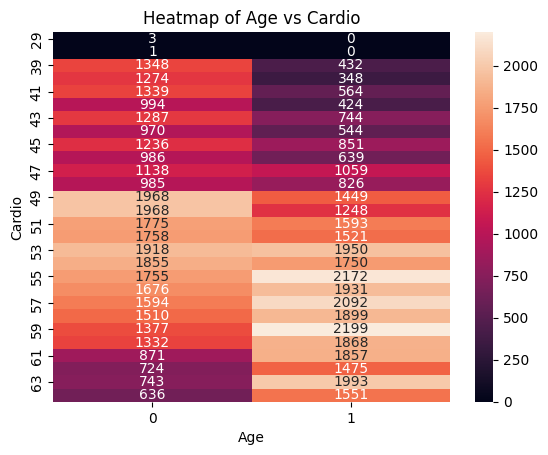

In [ ]:
#  Now we ploting heat map for age vs cardio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(pd.crosstab(crd['age'], crd['cardio']), annot=True, fmt='d')
plt.xlabel("Age")
plt.ylabel("Cardio")
plt.title("Heatmap of Age vs Cardio")
plt.show()


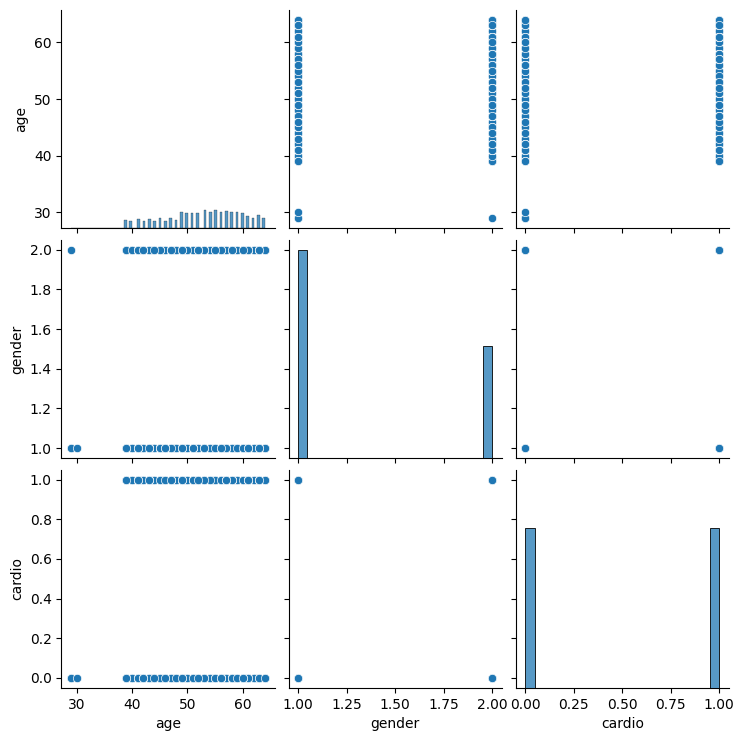

In [ ]:
# pair plot for age gender age cardio

import matplotlib.pyplot as plt
sns.pairplot(crd[['age', 'gender', 'cardio']])
plt.show()


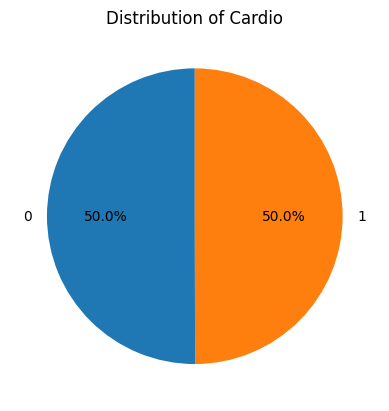

In [ ]:
#  pie chart for total number of people affected by cardio

import matplotlib.pyplot as plt
cardio_counts = crd['cardio'].value_counts()
plt.pie(cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cardio')
plt.show()


In [ ]:
#Completed data analysis and visualisation methods

In [ ]:
# Identify non-numeric columns
non_numeric_columns = crd.select_dtypes(exclude=['number']).columns.tolist()
# Exclude non-numeric columns when computing the correlation matrix
correlation_matrix = crd.drop(columns=non_numeric_columns).corr()


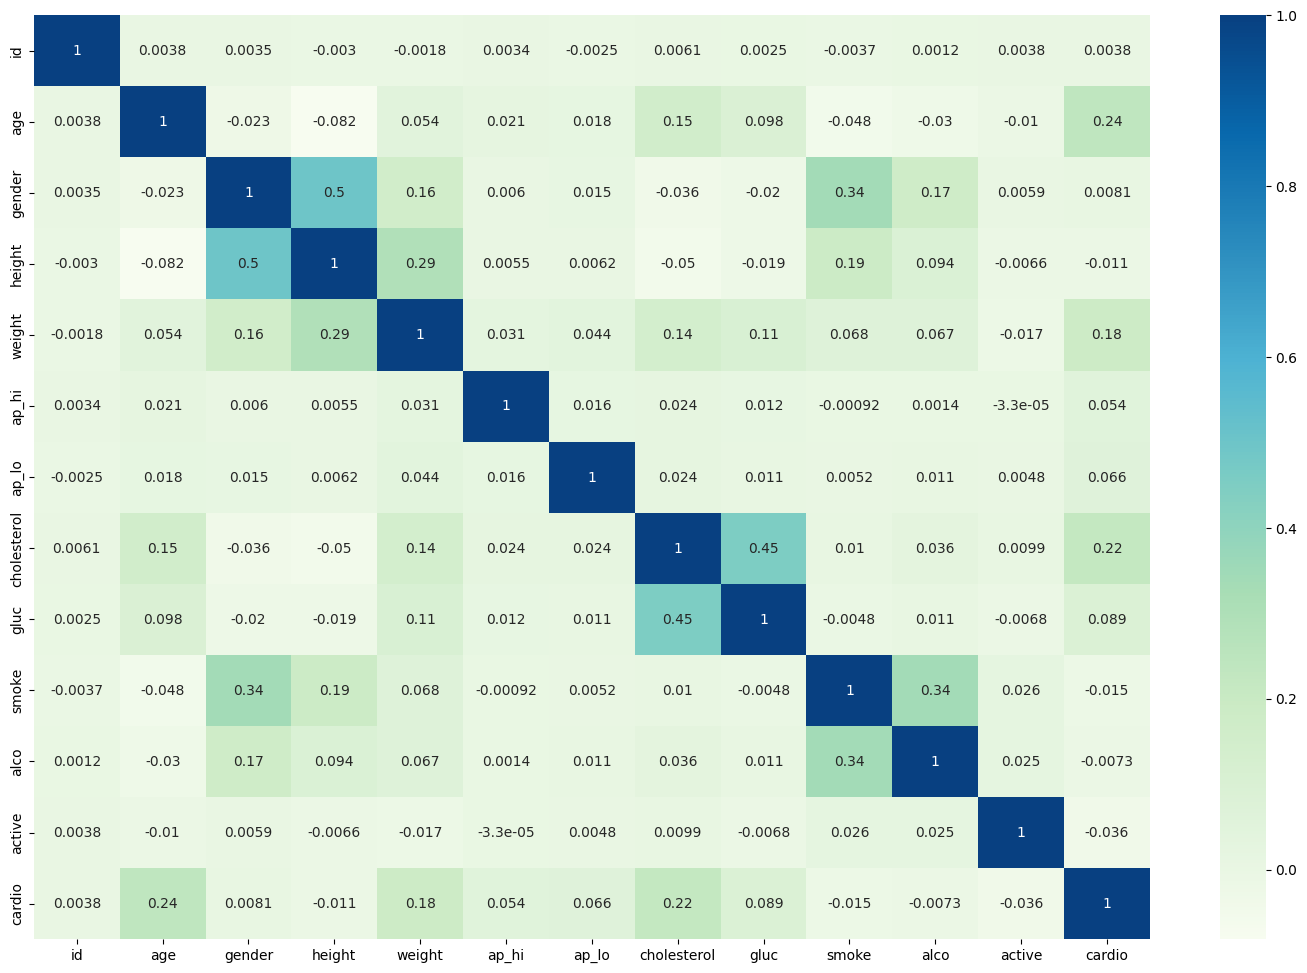

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix,annot=True,cmap='GnBu')
plt.show()

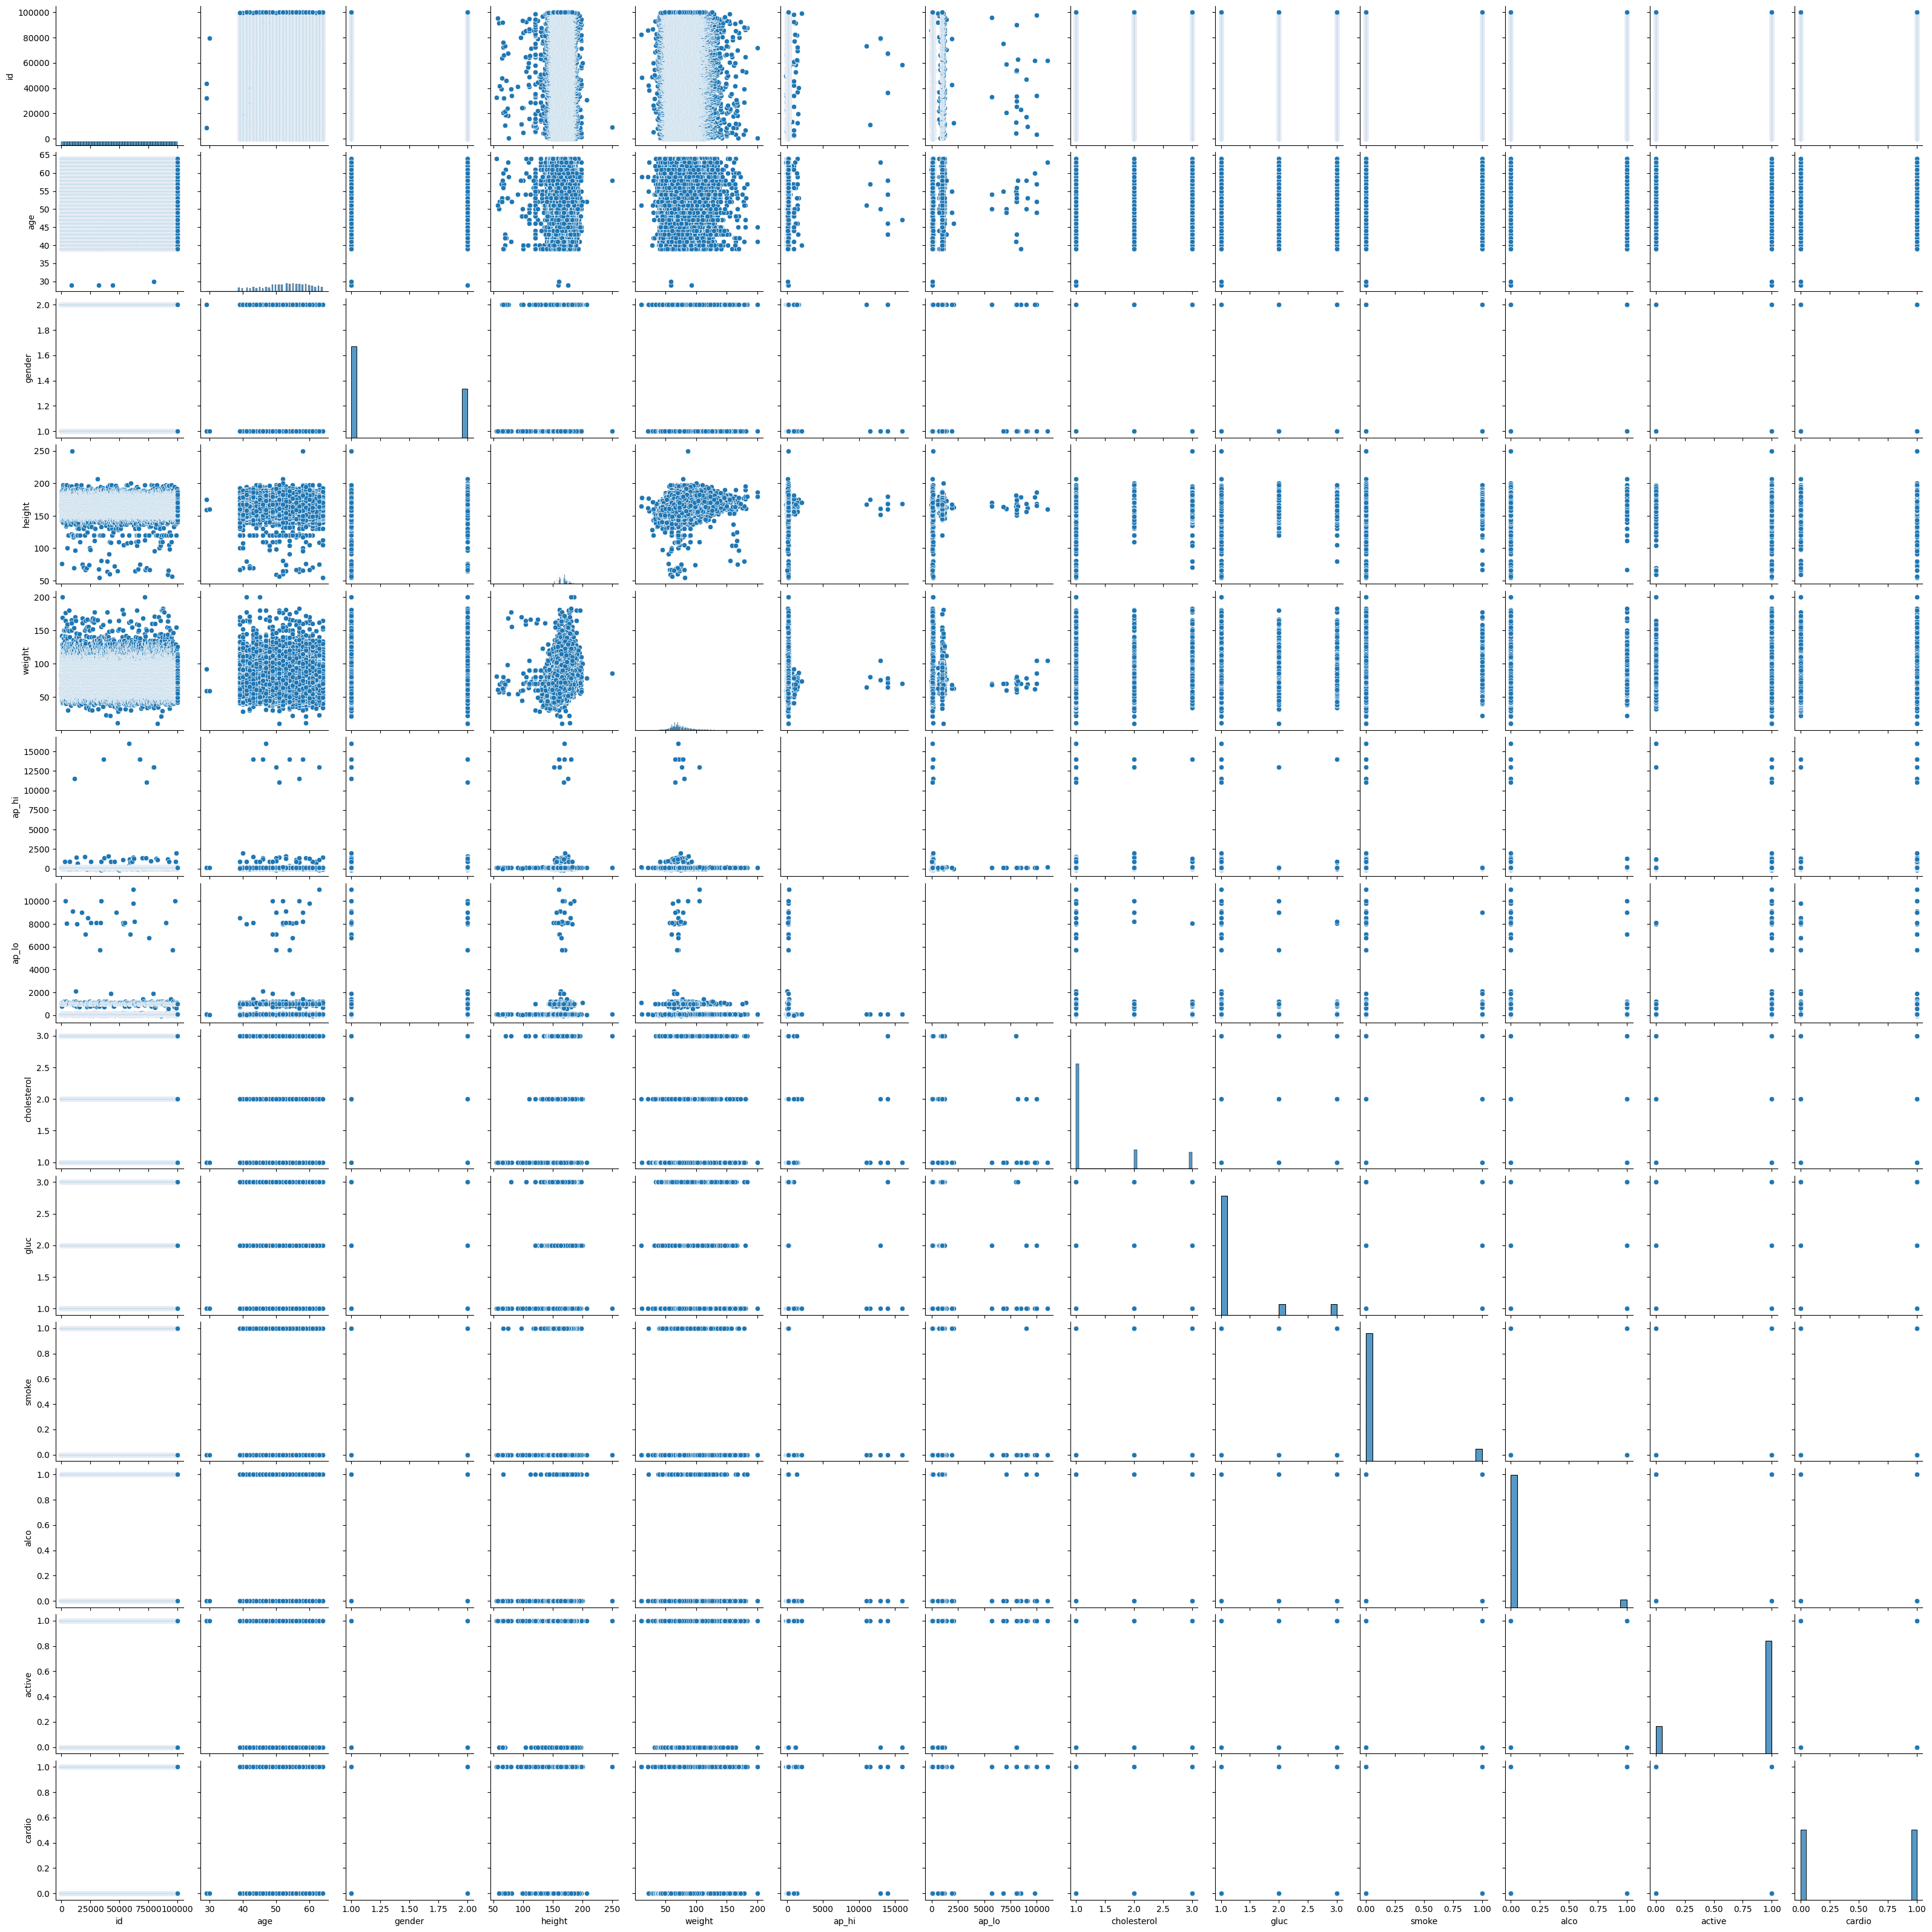

In [ ]:
sns.pairplot(crd)


In [ ]:
# Checking Duplicate Values
print(len(crd[crd.duplicated()]))

0


In [ ]:
#Checking for null values
crd.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: >

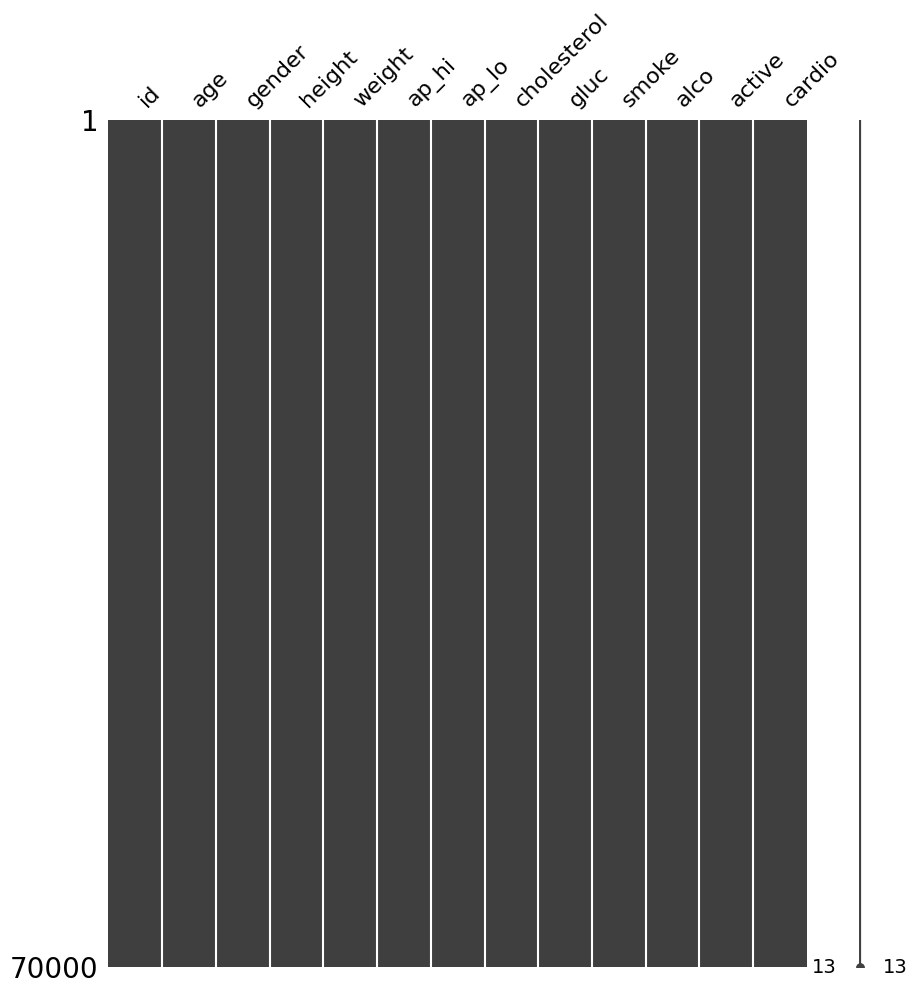

In [ ]:
#Missing Values
import missingno as msno
msno.matrix(crd,figsize=(10,11))

In [ ]:
print(crd.head())
print(crd.info())

   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight   

In [ ]:
crd.apply(pd.to_numeric, errors='coerce')
# Convert all columns to numeric, set non-convertible values as NaN
numeric_data = crd.select_dtypes(include=[np.number])
print(numeric_data.columns)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
# Checking Duplicate Values
print(len(crd[crd.duplicated()]))





0


In [ ]:
#Checking for null values
crd.isna().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# **Accuracy levels of machine learning techniques**

# SVM:
supervised machine learning model


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the SVM model with an RBF kernel
svc = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)

In [ ]:
# Train the model
svc.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [ ]:
# Make predictions
y_pred = svc.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# KNN:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#DT:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling (optional, but sometimes helpful for decision trees)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the Decision Tree model
DT = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = DT.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#LR:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Convert to a binary classification problem (e.g., class 0 vs. class 1)
# Filter out class 2
X = X[y != 2]
y = y[y != 2]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the Logistic Regression model
Lrc = LogisticRegression(random_state=42)

In [ ]:
# Train the model
Lrc.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions
y_pred = Lrc.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[17  0]
 [ 0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# RF:


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling (optional but can help with numerical stability)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Train the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rfc.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# prompt:  Drop rows with missing values (if any)

# Drop rows with missing values
crd_cleaned = crd.dropna()

# Check if any missing values remain
print(crd_cleaned.isnull().sum())


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: If 'gender' is a categorical variable
# df['gender'] = LabelEncoder().fit_transform(df['gender'])


In [ ]:
print(crd.columns)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
if 'target' in crd.columns:
    X = crd.drop('target', axis=1)
    y = crd['target']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
else:
    print("Column 'target' not found. Available columns are:")
    print(crd.columns)


Column 'target' not found. Available columns are:
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nbc = nbc.predict(X_test)

In [ ]:
# Naive Bayes Model Evaluation
print(confusion_matrix(y_test, y_pred_nbc))
print(classification_report(y_test, y_pred_nbc))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
nbc.score(X_test, y_test)

0.9777777777777777

In [ ]:
import numpy as np
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
acc_rfc = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
acc_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10, n_jobs=4)
acc_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
acc_nbc = cross_val_score(estimator=nbc, X=X_train, y=y_train, cv=10)
acc_DT = cross_val_score(estimator=DT, X=X_train, y=y_train, cv=10)

In [ ]:
model = ['Random Forest','SVC', 'KNN', 'Naive Bayes',"Decision Tree"]
scores = [np.mean(acc_rfc), np.mean(acc_svc),np.mean(acc_knn), np.mean(acc_nbc) , np.mean(acc_DT) ]

summary = pd.DataFrame(data=scores, index=model, columns=['Mean - Accuracy'])
summary.sort_values(by='Mean - Accuracy', ascending=False)

,Mean - Accuracy
SVC,0.935455
Random Forest,0.926364
KNN,0.926364
Naive Bayes,0.924545
Decision Tree,0.915455


In [ ]:
#The SVC model was the best performer out of the five models giving us a mean accuracy score of 93.5%.

#K-Fold cross validation was used to ensure no overfitting was done.

In [ ]:
# Model Built Successfully .

In [ ]:
# prompt:  the program should get the input from the user and must predict the cardiovascular disease id
# age
# gender
# height
# weight
# ap_hi
# ap_lo
# cholesterol
# gluc
# smoke
# alco
# active
# cardio

import pandas as pd
from sklearn.svm import SVC # Import SVC here
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming 'crd' is your DataFrame and it has the necessary columns
# ... (Your existing code)


# ... (Your existing code for data loading, preprocessing, etc.)

# Initialize and train the SVC model within this cell
svc = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)
# Load your dataset here (e.g., iris dataset)
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svc.fit(X_train, y_train)  # Train the model

# Get user input
user_input = {}
for feature in ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                'cholesterol', 'gluc', 'smoke', 'alco', 'active']:
  user_input[feature] = float(input(f"Enter {feature}: "))

# Convert user input to a DataFrame
user_df = pd.DataFrame([user_input])

# Preprocess user input
user_df_scaled = scaler.transform(user_df)  # Scale user input

# Make prediction using your trained model
prediction = svc.predict(user_df_scaled)  # Pass scaled data for prediction

# Interpret prediction
if prediction[0] == 0:
  print("No cardiovascular disease predicted.")
else:
  print("Cardiovascular disease predicted.")

Enter age: 18
Enter gender: 2
Enter height: 168
Enter weight: 62.0
Enter ap_hi: 110
Enter ap_lo: 80
Enter cholesterol: 1
Enter gluc: 1
Enter smoke: 0
Enter alco: 0
Enter active: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 11 features, but StandardScaler is expecting 4 features as input.